In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Past NOAA

In [2]:
model = xr.open_dataset('E://faks//cda//cmip6//AER_hist_1850-2014.nc')
time_slice = slice('1981-01-01','2014-12-31')
modelsel = model.sel(time=time_slice)
model_ham = modelsel.tas.drop_vars(['lat', 'lon','height']).sel(time=modelsel.time.dt.month.isin([1, 2, 3, 4, 10, 11, 12])) - 273.15

In [3]:
model_ham

<xarray.DataArray 'tas' (time: 172992)>
array([ 4.106598  ,  4.0871277 ,  4.0455627 , ..., -0.33828735,
       -0.43359375, -0.5713196 ], dtype=float32)
Coordinates:
  * time     (time) object 1981-01-01 00:30:00 ... 2014-12-31 23:30:00
    height   float64 ...
    lat      int32 ...
    lon      int32 ...

### Bias correction

In [4]:
bias_set = xr.open_dataset('E://faks//cda//era5//bias_monthly_NOAA_7.nc')
bias = bias_set.__xarray_dataarray_variable__.values

In [5]:
bias

array([1.14832749, 1.3306691 , 2.57404074, 3.07154228, 0.49501528,
       0.48992606, 0.15648764])

In [6]:
model_ham_grouped = model_ham.groupby(model_ham.time.dt.month)
months = [1, 2, 3,4, 10, 11, 12]
bias_index = 0
for month in months:
    model_ham_without_bias = model_ham_grouped.apply(lambda x: x - bias[bias_index])
    bias_index = bias_index + 1

In [7]:
model_ham_without_bias

<xarray.DataArray 'tas' (time: 172992)>
array([ 3.9501102,  3.93064  ,  3.889075 , ..., -0.494775 , -0.5900814,
       -0.7278072], dtype=float32)
Coordinates:
  * time     (time) object 1981-01-01 00:30:00 ... 2014-12-31 23:30:00
    height   float64 2.0
    lat      int32 56
    lon      int32 14

## And now the apples..

### Utah

In [8]:
temp=model_ham_without_bias
temp1=xr.where((temp>= 1.5) & (temp <= 2.4), 0.5 , np.nan)
temp2=xr.where((temp>= 2.5) & (temp <= 9.1), 1, np.nan)
temp3=xr.where((temp>= 9.2) & (temp <= 12.4), 0.5 , np.nan)
temp4=xr.where((temp>= 12.5) & (temp <= 15.9), 0 , np.nan)
temp5=xr.where((temp>= 16) & (temp <= 18), (-0.5) , np.nan)
temp6=xr.where((temp>= 18), -1 , np.nan)
hours = temp1 + temp2 + temp3 + temp4 + temp5 + temp6

In [9]:
yearsum1 = temp1.groupby('time.year').sum(dim='time')
yearsum2 = temp2.groupby('time.year').sum(dim='time')
yearsum3 = temp3.groupby('time.year').sum(dim='time')
yearsum4 = temp4.groupby('time.year').sum(dim='time')
yearsum5 = temp5.groupby('time.year').sum(dim='time')
yearsum6 = temp6.groupby('time.year').sum(dim='time')

In [10]:
yearsum = yearsum1 + yearsum2 + yearsum3 + yearsum4 + yearsum5 + yearsum6

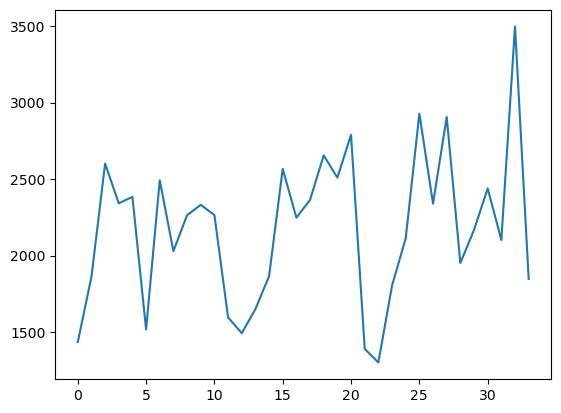

In [11]:
plt.plot(yearsum)

### Chill hour

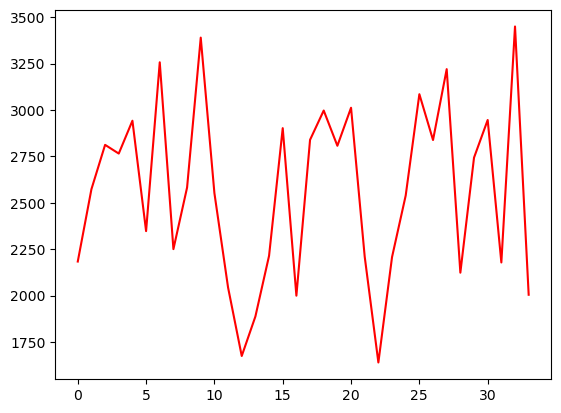

In [12]:
chill_hours = xr.where((temp>= 0) & (temp <= 7.2), 1 , np.nan)    #returns the variable 'chill_hours' with boolean values
chill_hours_year = chill_hours.groupby('time.year').sum(dim='time')
plt.plot(chill_hours_year, color='red')

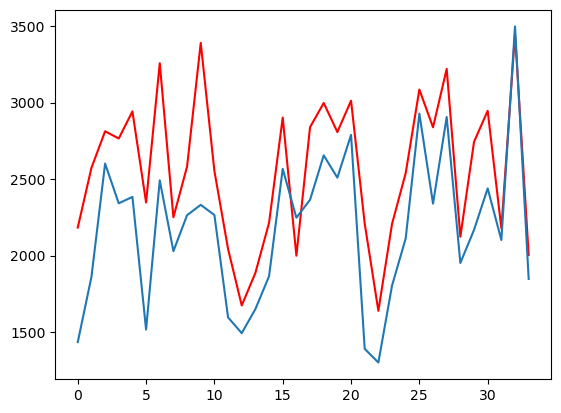

In [13]:
#comparison between apple models
plt.plot(chill_hours_year, color='red') #chill hour model
plt.plot(yearsum) #utah

# Future Hammoz

In [14]:
model_ssp = xr.open_dataset('E://faks//cda//cmip6//Hammoz_ssp_merge_new.nc')
model_ham_ssp = model_ssp.tas.drop_vars(['lat', 'lon','height']).sel(time=model_ssp.time.dt.month.isin([1, 2, 3,4, 10, 11, 12])) - 273.15

### Bias correction

In [15]:
model_ham_grouped_ssp = model_ham_ssp.groupby(model_ham_ssp.time.dt.month)
months = [1, 2, 3,4, 10, 11, 12]
bias_index = 0
for month in months:
    model_ham_without_bias_ssp = model_ham_grouped_ssp.apply(lambda x: x - bias[bias_index])
    bias_index = bias_index + 1

### Utah

In [16]:
temp=model_ham_without_bias_ssp
temp1=xr.where((temp>= 1.5) & (temp <= 2.4), 0.5 , np.nan)
temp2=xr.where((temp>= 2.5) & (temp <= 9.1), 1, np.nan)
temp3=xr.where((temp>= 9.2) & (temp <= 12.4), 0.5 , np.nan)
temp4=xr.where((temp>= 12.5) & (temp <= 15.9), 0 , np.nan)
temp5=xr.where((temp>= 16) & (temp <= 18), (-0.5) , np.nan)
temp6=xr.where((temp>= 18), -1 , np.nan)
hours = temp1 + temp2 + temp3 + temp4 + temp5 + temp6

In [17]:
yearsum1 = temp1.groupby('time.year').sum(dim='time')
yearsum2 = temp2.groupby('time.year').sum(dim='time')
yearsum3 = temp3.groupby('time.year').sum(dim='time')
yearsum4 = temp4.groupby('time.year').sum(dim='time')
yearsum5 = temp5.groupby('time.year').sum(dim='time')
yearsum6 = temp6.groupby('time.year').sum(dim='time')

In [18]:
yearsum_ssp = yearsum1 + yearsum2 + yearsum3 + yearsum4 + yearsum5 + yearsum6

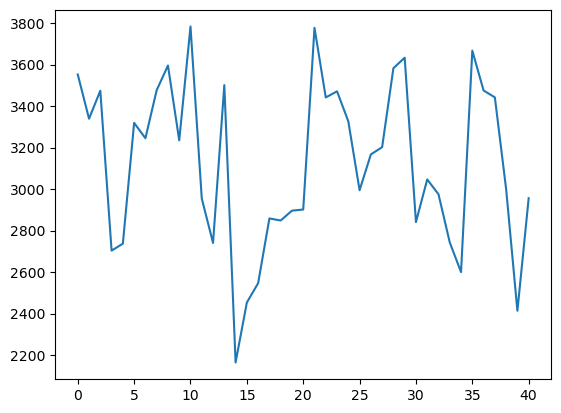

In [19]:
plt.plot(yearsum_ssp)

### Chill hour

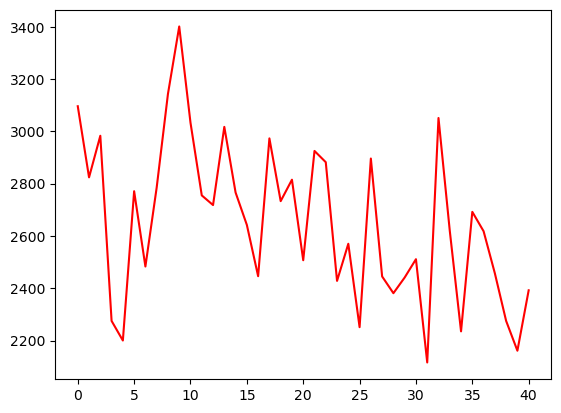

In [20]:
chill_hours = xr.where((temp>= 0) & (temp <= 7.2), 1 , np.nan)    #returns the variable 'chill_hours' with boolean values
chill_hours_year_ssp = chill_hours.groupby('time.year').sum(dim='time')
plt.plot(chill_hours_year_ssp, color='red')

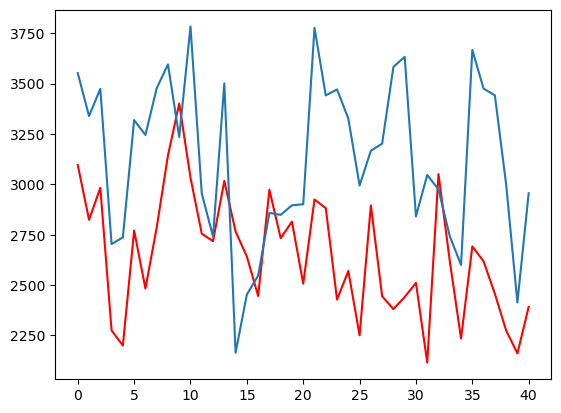

In [21]:
#comparison between apple models
plt.plot(chill_hours_year_ssp, color='red') #chill hour model
plt.plot(yearsum_ssp) #utah

--------

------

-----------

Visualisations we decided on:

# Utah model

In [22]:
#deviding the future into two periods:
time_slice1 = slice('2015-01-01T00:00:00.000000000','2035-12-31T23:30:00.000000000')
time_slice2 = slice('2035-01-01T00:00:00.000000000','2055-12-31T23:30:00.000000000')
yearsum_ssp1  = yearsum_ssp.sel(year=time_slice1).mean('year')
yearsum_ssp2  = yearsum_ssp.sel(year=time_slice2).mean('year')
chill_hours_year_ssp1  = chill_hours_year_ssp.sel(year=time_slice1).mean('year')
chill_hours_year_ssp2  = chill_hours_year_ssp.sel(year=time_slice2).mean('year')

In [23]:
yearsum_ssp1 

<xarray.DataArray 'tas' ()>
array(3038.65)
Coordinates:
    height   float64 2.0
    lat      int32 56
    lon      int32 14

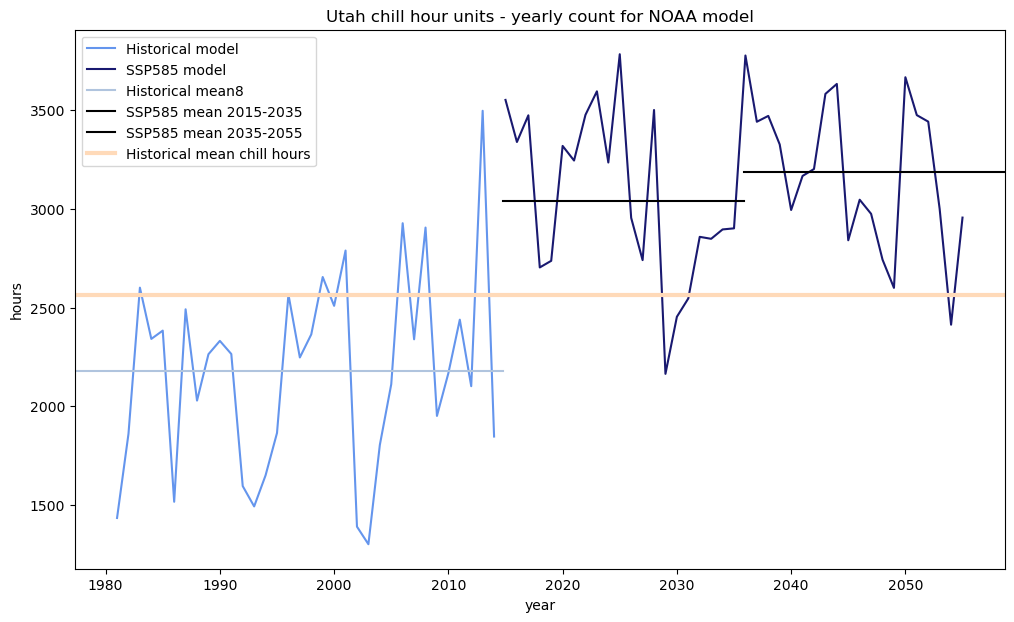

In [28]:
fig, ax = plt.subplots(figsize=(12, 7))
yearsum.plot(ax = ax, x='year',color = 'cornflowerblue', label='Historical model')
yearsum_ssp.plot(ax = ax, x='year', color = 'midnightblue', label='SSP585 model')
plt.title("Utah chill hour units - yearly count for the NOAA model")
ax.set_ylabel('hours')
ax.axhline(y=yearsum.mean('year'), color='lightsteelblue', label='Historical mean8', xmin=0, xmax=0.46)
ax.axhline(yearsum_ssp1, color='black', label='SSP585 mean 2015-2035', xmin=0.46, xmax=0.72)
ax.axhline(yearsum_ssp2, color='black', label='SSP585 mean 2035-2055 ', xmin=0.72, xmax=1)
ax.axhline(2563, color='peachpuff', label='Historical mean chill hours', linewidth=3)
ax.legend(loc='best')
plt.show()

# Chill hour

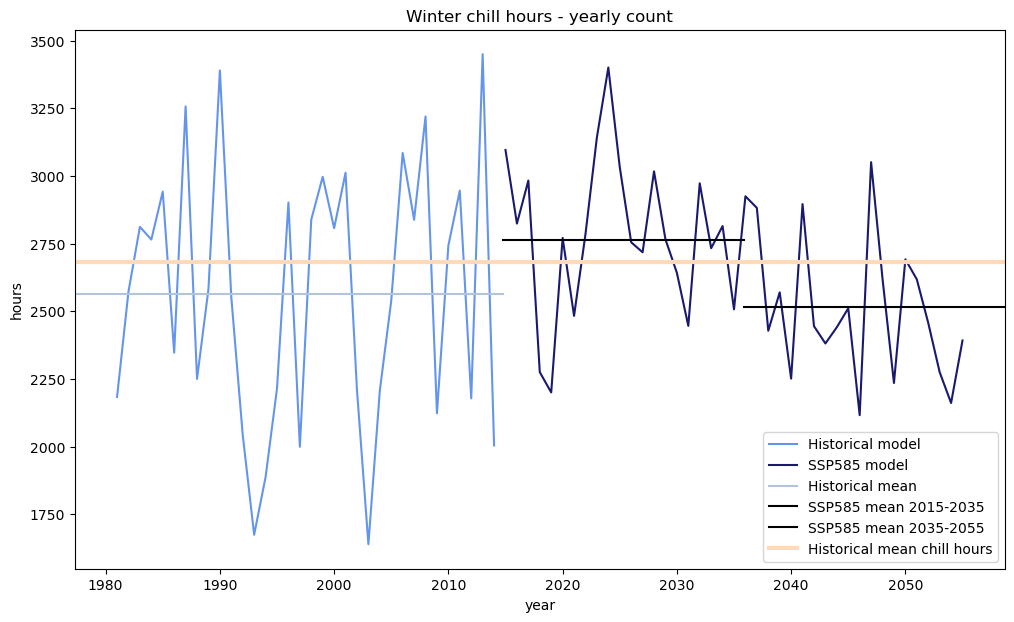

In [27]:
fig, ax = plt.subplots(figsize=(12, 7))
chill_hours_year.plot(ax = ax, x='year',color = 'cornflowerblue', label='Historical model')
chill_hours_year_ssp.plot(ax = ax, x='year', color = 'midnightblue', label='SSP585 model')
plt.title("Winter chill hours - yearly count")
ax.set_ylabel('hours')
ax.axhline(y=chill_hours_year.mean('year'), color='lightsteelblue', label='Historical mean', xmin=0, xmax=0.46)
ax.axhline(chill_hours_year_ssp1, color='black', label='SSP585 mean 2015-2035', xmin=0.46, xmax=0.72)
ax.axhline(chill_hours_year_ssp2, color='black', label='SSP585 mean 2035-2055 ', xmin=0.72, xmax=1)
ax.axhline(2683, color='peachpuff', label='Historical mean chill hours', linewidth=3)
ax.legend(loc='best')
plt.show()

--------------------

---------------------

--------------------